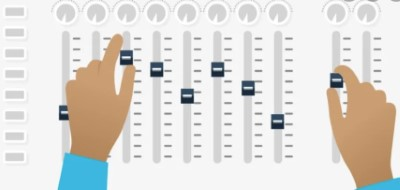  

# Special values
* About special values see great notebook [TPSMAR22 EDA which makes sense ⭐️⭐️⭐️⭐️⭐️](https://www.kaggle.com/ambrosm/tpsmar22-eda-which-makes-sense) by [Ambrosm](https://www.kaggle.com/ambrosm)
* I just replaced some congestion values in Ambrosm's [TPSMAR22 Don't forget to round!](https://www.kaggle.com/ambrosm/tpsmar22-don-t-forget-to-round), where he rounded the result of [mukaseevru](https://www.kaggle.com/mukaseevru) from [TPS_Mar_22 FE+LAMA (LightAutoML)](https://www.kaggle.com/mukaseevru/tps-mar-22-fe-lama-lightautoml). 

* To find exactly which values in the submission should be replaced with special ones, I'm using my this [TPS Mar 22, Step 0.1, Special values](https://www.kaggle.com/martynovandrey/tps-mar-22-step-0-1-special-values) notebook. See and maybe try to find some more!

* My own best result is **4.917**, from [TPS-Mar-22, MultiOutput CAT+Modeless](https://www.kaggle.com/martynovandrey/tps-mar-22-multioutput-cat-modeless), where I use **MultiOutputRegressor** with CatBoost and **ModellessRegressor**, for me it works the best. Would be nice if you have a look. **UPDATE:** For the moment my best result is **4,789**, see [here](https://www.kaggle.com/martynovandrey/tps-mar-22-fe-model-selection) for details and [TPS Mar 22, FE, the less the better](https://www.kaggle.com/martynovandrey/tps-mar-22-fe-the-less-the-better) for feature selection.

* The beginning of my EDA with visualisation and plotly animation is in the [TPS Mar 22, Step 0 - Data Exploration, animation](https://www.kaggle.com/martynovandrey/tps-mar-22-step-0-data-exploration-animation).

# Update:

* Ooriginal submission : [TPS_2022_03 Only one layer for Neural Network](https://www.kaggle.com/code/pourchot/tps-2022-03-only-one-layer-for-neural-network) with public score **4.764**

Thanks [@Laurent Pourchot](https://www.kaggle.com/pourchot) for sharing!


In [ ]:
import pandas as pd  
sub = pd.read_csv('../input/tps-2022-03-only-one-layer-for-neural-network/sub_blend.csv',  index_col="row_id")
sub_orig = sub.copy()

### Special values dataset is shared.

In [ ]:
special = pd.read_csv('../input/tps-mar-22-special-values/special v2.csv', index_col="row_id")
special = special[['congestion']].rename(columns={'congestion':'special'})
sub = sub.merge(special, left_index=True, right_index=True, how='left')
sub['special'] = sub['special'].fillna(sub['congestion']).round().astype(int)
sub = sub.drop(['congestion'], axis=1).rename(columns={'special':'congestion'})
sub.to_csv('submission rounded with special.csv', index=True)

In [ ]:
corr = sub.copy()
corr['orig'] = sub_orig['congestion']
corr['corrected'] = corr.orig != corr.congestion
corr.corrected.value_counts()